# Ethereum flaud classification
Data set:
- https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [2]:
## load data
df = pd.read_csv('../../Data/Ethereum_dataset.csv')
## drop unused columns
df = df.drop(columns=['Unnamed: 0', 'Index'])
## Strip space in front of column name
col_name = [col.strip() for col in df.columns]
df.columns = col_name

print(df.shape)
df.head()

(9841, 49)


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


#### List of preprocessing data
- Check duplication
- Check Null [Impute or Remove]
- Separate Category from Numerical features
- Check Outliner
- Check distribution of each features both categorical data and numerical data
- Correlation to Label
- Joint plot
- Feature selection
- Feature engineering

#### Drop duplicate data

In [3]:
# drop duplicate data
print(f'Number of rows before drop duplicate: {len(df)}')
df = df.drop_duplicates()
print(f'Number of rows after drop duplicate: {len(df)}')

Number of rows before drop duplicate: 9841
Number of rows after drop duplicate: 9823


#### Check Null data

In [4]:
df.isnull().sum()

Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract              

In [5]:
df.loc[(df['Total ERC20 tnxs'].isnull())
      & (df['ERC20_most_rec_token_type'].isnull())]

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7662,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916,0.0,0.0,0.0,16,17.528747,17.529785,0.0,0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,0x0153775362c3071c1860e8dbfd53ccc82fa226f5,1,0.00,0.00,15432.58,1,1,0,1,1,1.000000,1.000000,1.000000,0.999538,0.999538,0.999538,0.0,0.0,0.0,2,0.999538,1.000000,0.0,0.000462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,0x015f17e2851ea392351b7f259e4cfd03dc443cef,1,0.00,0.00,0.00,0,1,0,1,0,0.001540,0.001540,0.001540,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.001540,0.0,0.001540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,0x0167409e6106ec3e3f05a09fcf04606918d21ad5,1,259.52,2.60,4417.03,17,2,5,2,6,0.003349,0.070000,0.036675,0.000000,0.044494,0.003218,0.0,0.0,0.0,24,0.054714,0.073349,0.0,0.018635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b,1,193.09,81.82,1485.80,6,4,0,3,6,0.000100,8.293050,2.598288,0.312210,7.013525,1.731872,0.0,0.0,0.0,10,10.391234,10.393150,0.0,0.001916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,0xff2f6c6fbd71a078f1c1781855467d30897b5a33,1,0.00,49.51,12643.85,1,15,0,15,1,0.020005,5.000000,1.025080,15.375782,15.375782,15.375782,0.0,0.0,0.0,16,15.375782,15.376202,0.0,0.000420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,0xff35866acb80ce4b169d1460cd48108955c1c445,1,0.00,0.00,8427.92,0,1,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.loc[(df['ERC20_most_rec_token_type'].notnull())
           & (df['ERC20 most sent token type'].notnull())]
df.isnull().sum()

Address                                                 0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent t

#### Separate Category from Numerical features

In [7]:
# Separate Catergorical and Numerical features
unique = 'Address'
label = 'FLAG'
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in [unique, label]]
catergorical_features = [col for col in df.columns if df[col].dtype not in ['int64', 'float64'] and col not in [unique, label]]

In [8]:
df[numeric_features].describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,8963.000000,8963.000000,8.963000e+03,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8.963000e+03,8.963000e+03,8963.000000,8.963000e+03,8963.000000,8.963000e+03,8.963000e+03,8963.000000,8963.000000,8963.000000,8963.000000,8963.000000,8963.0,8963.0,8963.0,8963.0,8963.000000,8.963000e+03,8.963000e+03,8.963000e+03,8.963000e+03,8.963000e+03,8963.0,8963.0,8963.0,8963.000000,8963.000000
mean,5391.908460,8270.196001,2.344252e+05,122.528395,172.965302,4.076983,31.303135,26.859645,47.398525,572.347058,109.629272,5.046362,342.462837,48.407435,0.000003,0.000008,0.000006,299.570679,1.114008e+04,1.275651e+04,0.000008,1.616427e+03,36.386143,1.301550e+08,1.394178e+07,111.545702,5.661609,7.609506,0.003459,4.891331,0.0,0.0,0.0,0.0,488.200757,1.257633e+08,4.345188e+06,1.180533e+04,1.310523e+07,6.352908e+06,0.0,0.0,0.0,1.382908,4.816356
std,22170.270142,23433.284333,3.308689e+05,770.127006,961.829045,148.207751,302.047556,257.651235,337.101662,13630.016471,3022.375913,145.218779,6944.635138,249.108478,0.000236,0.000540,0.000339,1382.150824,3.754502e+05,3.816091e+05,0.000540,2.540216e+05,448.736008,1.056734e+10,1.183612e+09,6145.360856,105.539108,82.037402,0.065877,17.257298,0.0,0.0,0.0,0.0,16929.333215,1.056616e+10,2.146913e+08,1.056443e+06,1.183126e+09,5.930910e+08,0.0,0.0,0.0,6.731798,16.688863
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.213850e+02,1.000000,2.000000,0.000000,1.000000,1.000000,0.003000,1.018296,0.534210,0.000000,0.399958,0.148502,0.000000,0.000000,0.000000,4.000000,5.930868e-01,4.749598e+00,0.000000,9.100000e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,21.510000,756.350000,6.929822e+04,3.000000,5.000000,0.000000,2.000000,2.000000,0.100000,8.353539,2.229268,0.056001,6.457214,1.990380,0.000000,0.000000,0.000000,10.000000,1.917000e+01,4.142371e+01,0.000000,1.992218e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,741.145000,5876.405000,3.233337e+05,13.000000,30.000000,0.000000,5.000000,3.000000,3.112588,78.414339,33.666667,0.998964,72.062216,27.831428,0.000000,0.000000,0.000000,66.000000,1.009990e+02,1.010000e+02,0.000000,6.7

#### Check outliner

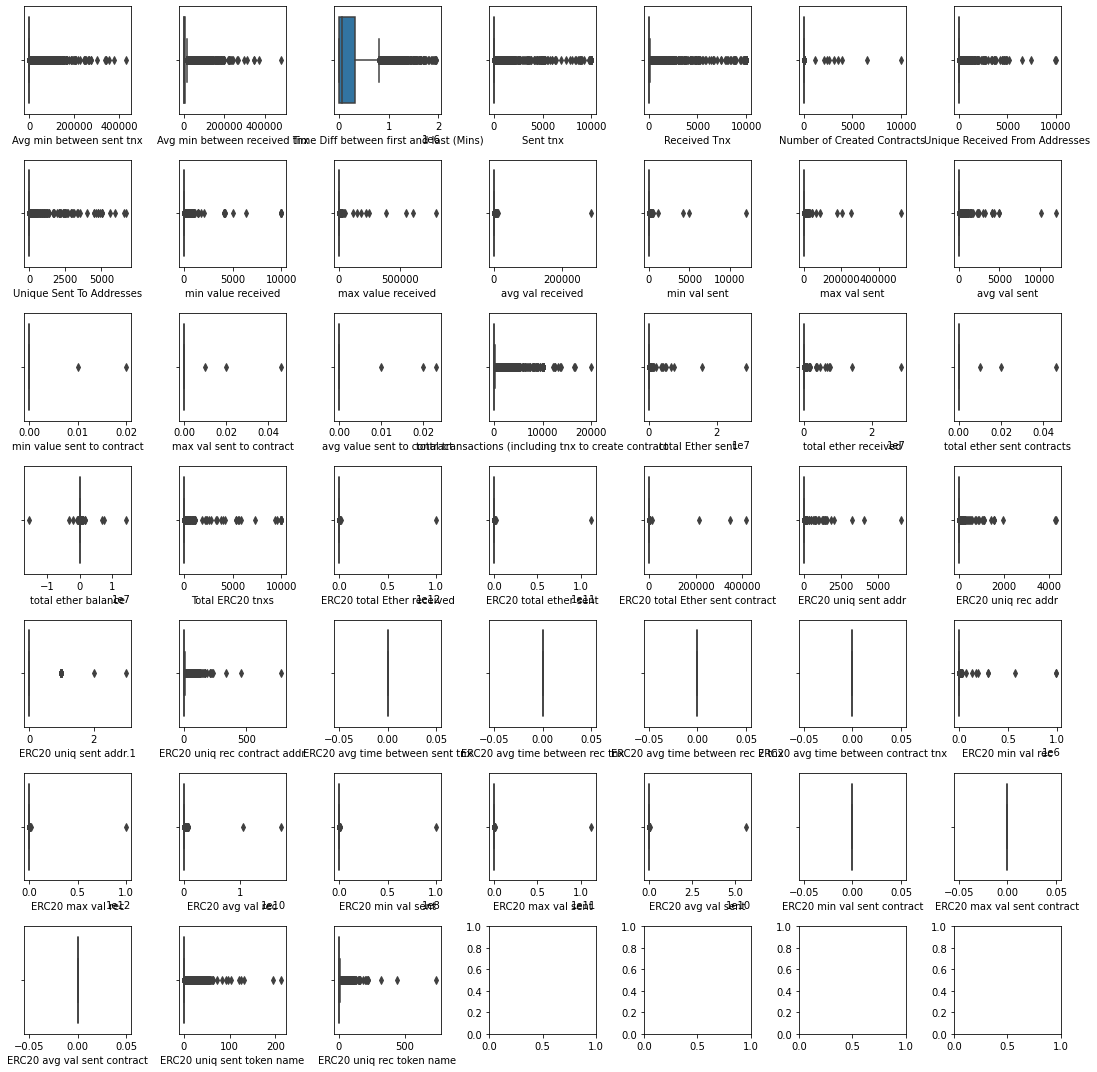

In [9]:
## Check outliner
_, axes = plt.subplots(7, 7, figsize=(15, 15))
ax = axes.ravel()                     # flatten the 2D array
for i in range(len(numeric_features)):
    sns.boxplot(data=df, x=numeric_features[i], ax=ax[i])
plt.tight_layout()
plt.show()

#### Check distribution of each features both categorical data and numerical data

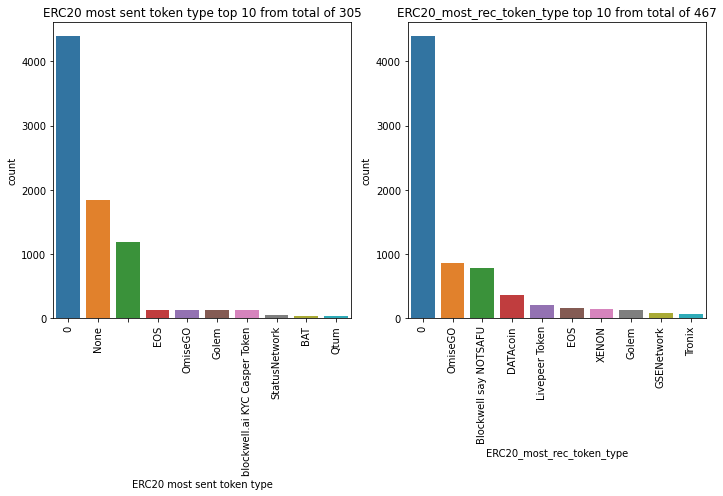

In [10]:
## See Catergory data
_, axes = plt.subplots(1, 2, figsize=(10, 7))
ax = axes.ravel()
for i in range(len(catergorical_features)):
    g = sns.countplot(data=df, x=catergorical_features[i], ax=ax[i]
                  , order=df[catergorical_features[i]].value_counts()[:10].index)
    g.tick_params(axis='x', rotation=90)
    g.set(title=f"{catergorical_features[i]} top 10 from total of {df[catergorical_features[i]].nunique()}")
plt.tight_layout()
plt.show()

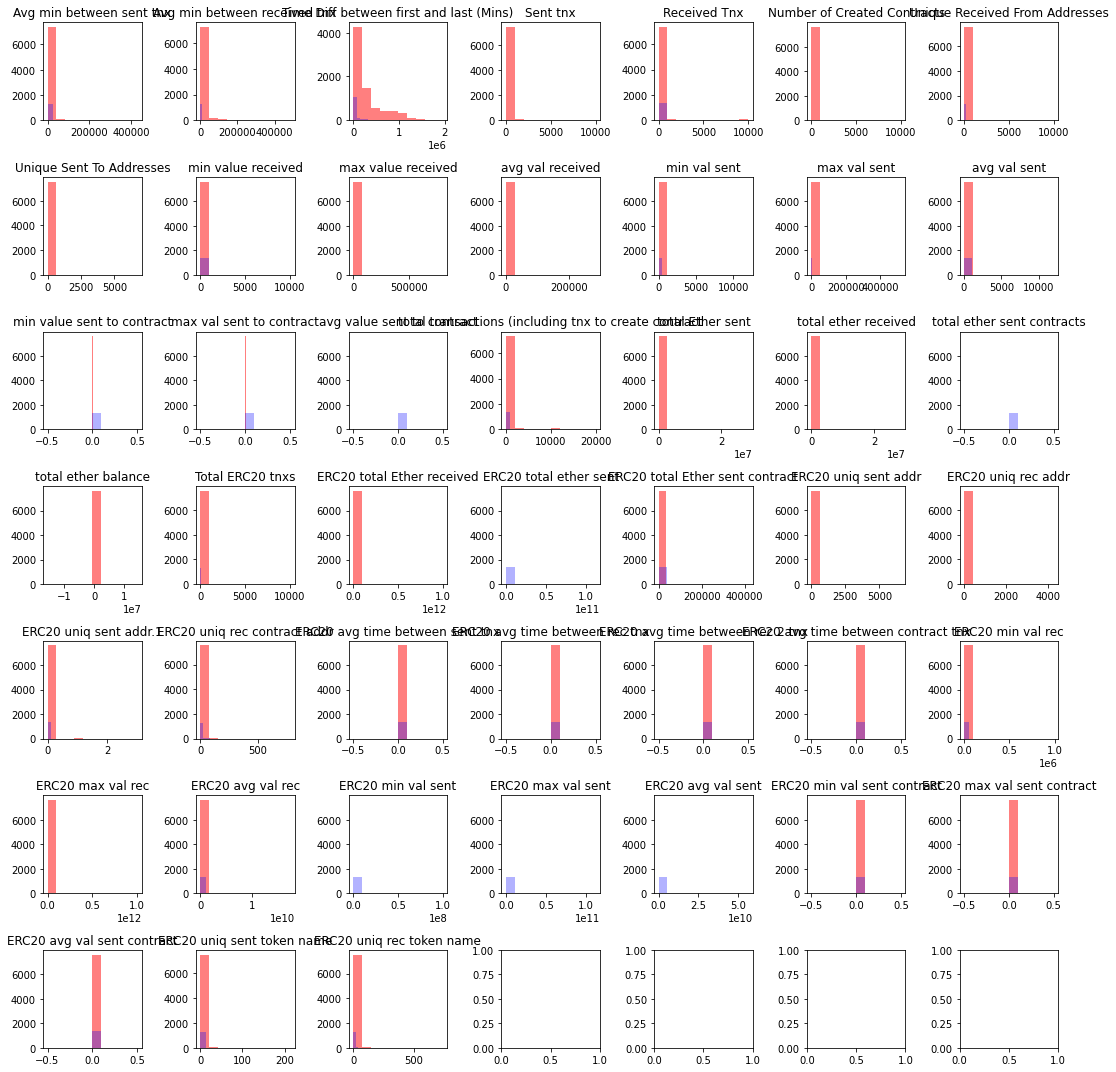

In [11]:
## Check Pair plot
normal_df = df.loc[df['FLAG']==0].copy()
fraud_df = df.loc[df['FLAG']==1].copy()
_, axes = plt.subplots(7, 7, figsize=(15, 15))
ax = axes.ravel()                     # flatten the 2D array
for i in range(len(numeric_features[:])):
    # sns.histplot(data=df, x=numeric_features[i], hue=label, ax=ax[i])
    bins = 10
    #---plot histogram for each feature---
    ax[i].hist(normal_df[numeric_features[i]], bins=bins, color='r', alpha=.5)
    ax[i].hist(fraud_df[numeric_features[i]], bins=bins, color='b', alpha=0.3)
    ax[i].set_title(numeric_features[i], fontsize=12)  

plt.tight_layout()
plt.show()

#### Correlation to Label

<AxesSubplot:>

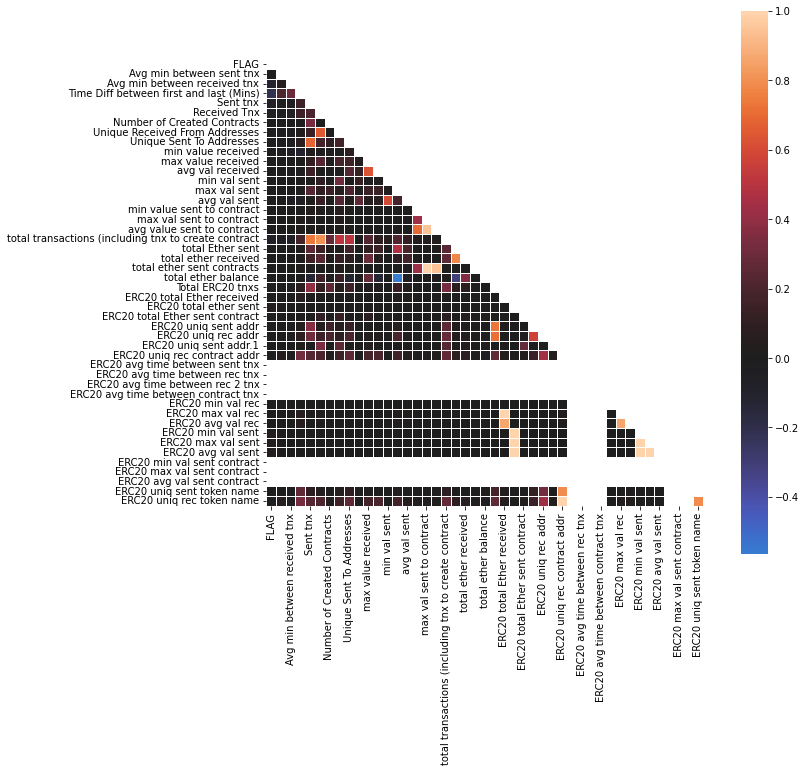

In [12]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,  mask=mask, annot=False,center=0, linewidths=0.8, square=True)

#### Feature selection

In [13]:
## Feature selection
df = df.drop(columns=['ERC20 most sent token type', 'ERC20_most_rec_token_type'])

#### Feature Engineering

In [14]:
## None

## Model
- Classify without oversampling
- Classify with oversampling
- Classify with oversampling + Dimensionality reduction

### Classify without oversampling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
## https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

In [16]:
## perform encoder
# label_quality = LabelEncoder()
# df['Address'] = label_quality.fit_transform(df['Address'])
df = df.drop(columns='Address')

In [17]:
## split train/ test dataset
features = [col for col in df.columns if col != label]
x_train, x_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.30, random_state=17)

## Create model
models = {'LogisticRegression' : LogisticRegression()
          ,'DecisionTree' : DecisionTreeClassifier()
          ,'LinearSVM' : LinearSVC()
          ,'rbfSVM' : SVC(kernel='rbf')
          ,'RandomForest' : RandomForestClassifier()
          ,'GradientBoosting' : GradientBoostingClassifier()
          ,'XGBoost' : XGBClassifier()
          ,'LightGBM' : LGBMClassifier()
         }

## Evaluation
model_name_list = list(models)
accuracy_list = list()
tn_list = list()
fp_list = list()
fn_list = list()
tp_list = list()
precision_list = list()
recall_list = list()
f1_list = list()
auc_dict = dict()
fpr_dict = dict()
tpr_dict = dict()

for _model_name, _model in tqdm(models.items()):
    classification_model = _model
    classification_model.fit(x_train, y_train)
    y_pred = classification_model.predict(x_test)
    
    acc_score = accuracy_score(y_pred, y_test)
    prec = precision_score(y_pred, y_test)
    rec = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    
    accuracy_list.append(acc_score)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    if hasattr(classification_model, "decision_function"):
        y_score = classification_model.decision_function(x_test)
    else:
        y_score = classification_model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_dict[_model_name] = auc_score
    fpr_dict[_model_name] = fpr
    tpr_dict[_model_name] = tpr

print('---------Finished---------')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\freshket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 12%|██████████▌                                                                         | 1/8 [00:00<00:01,  4.82it/s]C:\Users\freshket\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
 38%|█████████████████████████

[17:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.08s/it]

---------Finished---------


In [18]:
df_eval = pd.DataFrame({
                        'model' : model_name_list
                        ,'accuracy' : accuracy_list
                        ,'TN' : tn_list
                        ,'FP' : fp_list
                        ,'FN' : fn_list
                        ,'TP' : tp_list
                        ,'precision' : precision_list
                        ,'recall' : recall_list
                        ,'f1' : f1_list
                        ,'auc' : auc_dict.values()
                        })
df_eval

,model,accuracy,TN,FP,FN,TP,precision,recall,f1,auc
0,LogisticRegression,0.855708,2298,2,386,3,0.007712,0.600000,0.015228,0.641620
1,DecisionTree,0.969877,2260,40,41,348,0.894602,0.896907,0.895753,0.938605
2,LinearSVM,0.698029,1670,630,182,207,0.532134,0.247312,0.337684,0.582292
3,rbfSVM,0.855337,2300,0,389,0,0.000000,0.000000,0.000000,0.584226
4,RandomForest,0.980662,2296,4,48,341,0.876607,0.988406,0.929155,0.997267
5,GradientBoosting,0.981778,2295,5,44,345,0.886889,0.985714,0.933694,0.996638
6,XGBoost,0.988843,2293,7,23,366,0.940874,0.981233,0.960630,0.997854
7,LightGBM,0.987728,2291,9,24,365,0.938303,0.975936,0.956750,0.997890


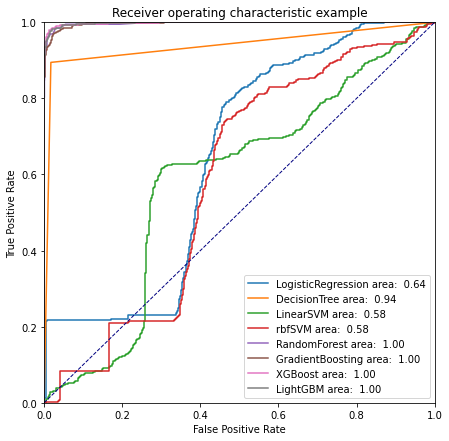

In [19]:
plt.figure(figsize=(7,7))
lw = 1

for _model_name in models.keys():
    plt.plot(fpr_dict[_model_name], tpr_dict[_model_name], label = f"{_model_name} area: {auc_dict[_model_name] : .2f}")

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
    
plt.show()

### Classify with oversampling
- SMOTE as oversampling technique

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote_model = SMOTE(random_state = 10)
x_smote, y_smote = smote_model.fit_sample(x_train, y_train)
x_smote_test, y_smote_test = smote_model.fit_sample(x_test, y_test)

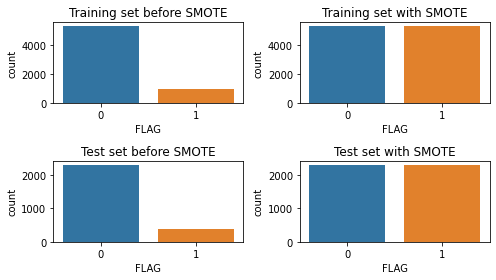

In [36]:
_, axes = plt.subplots(2, 2, figsize=(7, 4))
ax = axes.ravel()

sns.countplot(x=pd.Series(y_train), ax=ax[0])
sns.countplot(x=pd.Series(y_smote), ax=ax[1])
sns.countplot(x=pd.Series(y_test), ax=ax[2])
sns.countplot(x=pd.Series(y_smote_test), ax=ax[3])

ax[0].set_title("Training set before SMOTE", fontsize=12)
ax[1].set_title("Training set with SMOTE", fontsize=12)
ax[2].set_title("Test set before SMOTE", fontsize=12)
ax[3].set_title("Test set with SMOTE", fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
## Create model
models = {'LogisticRegression' : LogisticRegression()
          ,'DecisionTree' : DecisionTreeClassifier()
          ,'LinearSVM' : LinearSVC()
          ,'rbfSVM' : SVC(kernel='rbf')
          ,'RandomForest' : RandomForestClassifier()
          ,'GradientBoosting' : GradientBoostingClassifier()
          ,'XGBoost' : XGBClassifier()
          ,'LightGBM' : LGBMClassifier()
         }

## Evaluation
model_name_list = list(models)
accuracy_list = list()
tn_list = list()
fp_list = list()
fn_list = list()
tp_list = list()
precision_list = list()
recall_list = list()
f1_list = list()
auc_dict = dict()
fpr_dict = dict()
tpr_dict = dict()

for _model_name, _model in tqdm(models.items()):
    classification_model = _model
    classification_model.fit(x_smote, y_smote)
    y_pred = classification_model.predict(x_smote_test)
    
    acc_score = accuracy_score(y_pred, y_smote_test)
    prec = precision_score(y_pred, y_smote_test)
    rec = recall_score(y_pred, y_smote_test)
    f1 = f1_score(y_pred, y_smote_test)
    
    accuracy_list.append(acc_score)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
    tn, fp, fn, tp = confusion_matrix(y_smote_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    if hasattr(classification_model, "decision_function"):
        y_score = classification_model.decision_function(x_smote_test)
    else:
        y_score = classification_model.predict_proba(x_smote_test)[:,1]
    fpr, tpr, _ = roc_curve(y_smote_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_dict[_model_name] = auc_score
    fpr_dict[_model_name] = fpr
    tpr_dict[_model_name] = tpr

print('---------Finished---------')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\freshket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 25%|█████████████████████                                                               | 2/8 [00:00<00:01,  3.55it/s]C:\Users\freshket\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
 75%|█████████████████████████

[17:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:31<00:00,  3.95s/it]

---------Finished---------


In [24]:
df_eval_2 = pd.DataFrame({
                        'model' : model_name_list
                        ,'accuracy' : accuracy_list
                        ,'TN' : tn_list
                        ,'FP' : fp_list
                        ,'FN' : fn_list
                        ,'TP' : tp_list
                        ,'precision' : precision_list
                        ,'recall' : recall_list
                        ,'f1' : f1_list
                        ,'auc' : auc_dict.values()
                        })
df_eval_2

,model,accuracy,TN,FP,FN,TP,precision,recall,f1,auc
0,LogisticRegression,0.608043,2298,2,1801,499,0.216957,0.996008,0.356301,0.647295
1,DecisionTree,0.964130,2251,49,116,2184,0.949565,0.978056,0.963600,0.964130
2,LinearSVM,0.735000,1905,395,824,1476,0.641739,0.788883,0.707744,0.734385
3,rbfSVM,0.504130,19,2281,0,2300,1.000000,0.502074,0.668507,0.595175
4,RandomForest,0.984565,2284,16,55,2245,0.976087,0.992923,0.984433,0.999098
5,GradientBoosting,0.980870,2262,38,50,2250,0.978261,0.983392,0.980820,0.998614
6,XGBoost,0.985870,2289,11,54,2246,0.976522,0.995126,0.985736,0.999062
7,LightGBM,0.988261,2286,14,40,2260,0.982609,0.993843,0.988194,0.999253


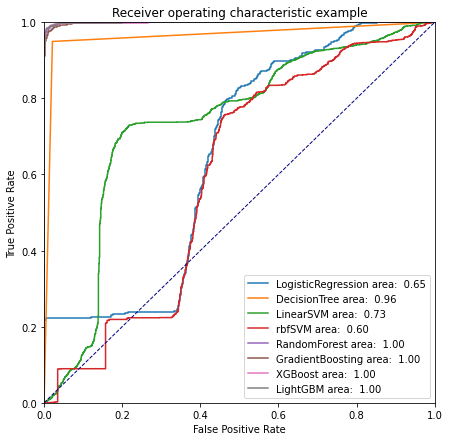

In [25]:
plt.figure(figsize=(7,7))
lw = 1

for _model_name in models.keys():
    plt.plot(fpr_dict[_model_name], tpr_dict[_model_name], label = f"{_model_name} area: {auc_dict[_model_name] : .2f}")

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
    
plt.show()

### Classify with oversampling + Dimensionality reduction
- SMOTE as oversampling technique
- PCA as dimensionality reduction technique
    - https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e
    - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- Pros
> - Transform a set of features in a dataset into a smaller number of features while trying to retain as much information as the original dataset
> - Remove multi-collinearity problems
- Cons
> - Less interpretable
> - Required scaling data prior processing

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [28]:
pca = PCA(.95)
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)
x_test_pca = pca.transform(x_test_scaler)

In [29]:
smote_model = SMOTE(random_state = 10)
x_pca_smote, y_pca_smote = smote_model.fit_sample(x_train_pca, y_train)
x_pca_smote_test, y_pca_smote_test = smote_model.fit_sample(x_test_pca, y_test)

In [30]:
## Create model
models = {'LogisticRegression' : LogisticRegression()
          ,'DecisionTree' : DecisionTreeClassifier()
          ,'LinearSVM' : LinearSVC()
          ,'rbfSVM' : SVC(kernel='rbf')
          ,'RandomForest' : RandomForestClassifier()
          ,'GradientBoosting' : GradientBoostingClassifier()
          ,'XGBoost' : XGBClassifier()
          ,'LightGBM' : LGBMClassifier()
         }

## Evaluation
model_name_list = list(models)
accuracy_list = list()
tn_list = list()
fp_list = list()
fn_list = list()
tp_list = list()
precision_list = list()
recall_list = list()
f1_list = list()
auc_dict = dict()
fpr_dict = dict()
tpr_dict = dict()

for _model_name, _model in tqdm(models.items()):
    classification_model = _model
    classification_model.fit(x_pca_smote, y_pca_smote)
    y_pred = classification_model.predict(x_pca_smote_test)
    
    acc_score = accuracy_score(y_pred, y_pca_smote_test)
    prec = precision_score(y_pred, y_pca_smote_test)
    rec = recall_score(y_pred, y_pca_smote_test)
    f1 = f1_score(y_pred, y_pca_smote_test)
    
    accuracy_list.append(acc_score)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
    tn, fp, fn, tp = confusion_matrix(y_pca_smote_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    if hasattr(classification_model, "decision_function"):
        y_score = classification_model.decision_function(x_pca_smote_test)
    else:
        y_score = classification_model.predict_proba(x_pca_smote_test)[:,1]
    fpr, tpr, _ = roc_curve(y_pca_smote_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_dict[_model_name] = auc_score
    fpr_dict[_model_name] = fpr
    tpr_dict[_model_name] = tpr

print('---------Finished---------')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\freshket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 25%|█████████████████████                                                               | 2/8 [00:00<00:01,  5.43it/s]C:\Users\freshket\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
 75%|█████████████████████████

[17:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:24<00:00,  3.10s/it]

---------Finished---------


In [31]:
df_eval_2 = pd.DataFrame({
                        'model' : model_name_list
                        ,'accuracy' : accuracy_list
                        ,'TN' : tn_list
                        ,'FP' : fp_list
                        ,'FN' : fn_list
                        ,'TP' : tp_list
                        ,'precision' : precision_list
                        ,'recall' : recall_list
                        ,'f1' : f1_list
                        ,'auc' : auc_dict.values()
                        })
df_eval_2

,model,accuracy,TN,FP,FN,TP,precision,recall,f1,auc
0,LogisticRegression,0.714130,1303,997,318,1982,0.861739,0.665324,0.750900,0.864832
1,DecisionTree,0.918043,2213,87,290,2010,0.873913,0.958512,0.914260,0.918043
2,LinearSVM,0.722826,1290,1010,265,2035,0.884783,0.668309,0.761459,0.863162
3,rbfSVM,0.793261,1571,729,222,2078,0.903478,0.740292,0.813785,0.895633
4,RandomForest,0.942609,2249,51,213,2087,0.907391,0.976146,0.940514,0.991205
5,GradientBoosting,0.944565,2197,103,152,2148,0.933913,0.954243,0.943968,0.988939
6,XGBoost,0.943043,2248,52,210,2090,0.908696,0.975724,0.941018,0.991566
7,LightGBM,0.945435,2244,56,195,2105,0.915217,0.974086,0.943735,0.992584


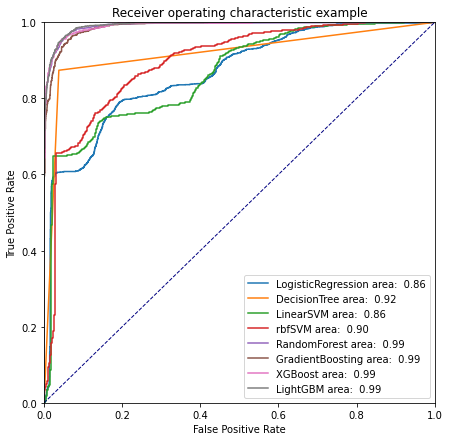

In [32]:
plt.figure(figsize=(7,7))
lw = 1

for _model_name in models.keys():
    plt.plot(fpr_dict[_model_name], tpr_dict[_model_name], label = f"{_model_name} area: {auc_dict[_model_name] : .2f}")

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
    
plt.show()